In [1]:
import numpy as np
import scipy.stats  
import matplotlib.pyplot as plt
import pandas as pd
import io

In [ ]:
#import the file
from google.colab import files
uploaded = files.upload()

Saving M3_dataset (1).csv to M3_dataset (1).csv


In [ ]:
#Read the csv file containing the dataframe
df = pd.read_csv('M3_dataset (1).csv')

In [ ]:
# Let's take a closer look at it
df.head()

,Unnamed: 0,PersonNumber,FirstName,LastName,GenderAsString,CantonAbbreviation,PartyName,ParlGroupName,ParlGroupAbbreviation,BirthPlace_Canton,...,BGer,BK,EDA,EDI,EFD,EJPD,Parl,UVEK,VBS,WBF
0,0,1138,Martin,Bäumle,m,ZH,Grünliberale Partei,Grünliberale Fraktion,GL,ZH,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1138,Martin,Bäumle,m,ZH,Grünliberale Partei,Grünliberale Fraktion,GL,ZH,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1138,Martin,Bäumle,m,ZH,Grünliberale Partei,Grünliberale Fraktion,GL,ZH,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1138,Martin,Bäumle,m,ZH,Grünliberale Partei,Grünliberale Fraktion,GL,ZH,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,3897,Tiana Angelina,Moser,f,ZH,Grünliberale Partei,Grünliberale Fraktion,GL,ZH,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# What columns are contained within this dataframe?
df.columns

Index(['Unnamed: 0', 'PersonNumber', 'FirstName', 'LastName', 'GenderAsString',
       'CantonAbbreviation', 'PartyName', 'ParlGroupName',
       'ParlGroupAbbreviation', 'BirthPlace_Canton', 'DateJoining',
       'DateLeaving', 'DateOfBirth', 'Age', 'Region_x', 'Region_y', 'IdVote',
       'Decision', 'DecisionText', 'BusinessNumber', 'BusinessTitle',
       'IdSession', 'ID', 'BusinessType', 'BusinessTypeName',
       'SubmissionSession', 'Bildung/Wissenschaft', 'Energie/Umwelt/Land',
       'Finanz/Wirtschaft', 'Medien/Kultur', 'Politik', 'Recht', 'Sozial',
       'BGer', 'BK', 'EDA', 'EDI', 'EFD', 'EJPD', 'Parl', 'UVEK', 'VBS',
       'WBF'],
      dtype='object')

In [ ]:
df_unique_vote = df['IdVote']
num_values = len(set(df_unique_vote))
print(num_values)

267


# Descriptive Statistics

## Business

In [ ]:
import seaborn as sns

In [ ]:
# Only select the needed columns

cols = ['IdSession', 'BusinessNumber','IdVote', 'Bildung/Wissenschaft', 'Energie/Umwelt/Land',
       'Finanz/Wirtschaft', 'Medien/Kultur', 'Politik', 'Recht', 'Sozial', 'BGer', 'BK', 'EDA', 'EDI', 'EFD', 'EJPD', 'Parl', 'UVEK', 'VBS', 
        'WBF']
df_object= df.loc[:, cols]

In [ ]:
len(df_object.index)

49871

In [ ]:
#delete duplicates
df_unique_vote = df_object['IdVote']
num_values = len(set(df_unique_vote))
print(num_values)

267


In [ ]:
df_object2 = df_object.drop_duplicates(subset=['IdVote'], keep='first')
len(df_object2)

267

In [ ]:
df_object2.head()

,IdSession,BusinessNumber,IdVote,Bildung/Wissenschaft,Energie/Umwelt/Land,Finanz/Wirtschaft,Medien/Kultur,Politik,Recht,Sozial,BGer,BK,EDA,EDI,EFD,EJPD,Parl,UVEK,VBS,WBF
0,5115,20220003,28693,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5115,20220003,28694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5115,20220003,28695,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5115,20220003,28696,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
768,5115,20220007,28697,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Creating a dataset with only the tags-columns
cols = ['Bildung/Wissenschaft', 'Energie/Umwelt/Land',
       'Finanz/Wirtschaft', 'Medien/Kultur', 'Politik', 'Recht', 'Sozial']
df_object_tag= df_object2.loc[:, cols]

In [ ]:
df_object_tag

,Bildung/Wissenschaft,Energie/Umwelt/Land,Finanz/Wirtschaft,Medien/Kultur,Politik,Recht,Sozial
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
768,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
48973,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49149,0.0,0.0,0.0,0.0,1.0,1.0,1.0
49331,0.0,0.0,0.0,1.0,0.0,1.0,1.0
49510,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
#count number of businesses for each tag
for i in df_object_tag.columns:
    x = df_object_tag[i].value_counts()
    print(x)

0.0    261
1.0      6
Name: Bildung/Wissenschaft, dtype: int64
0.0    200
1.0     67
Name: Energie/Umwelt/Land, dtype: int64
1.0    137
0.0    130
Name: Finanz/Wirtschaft, dtype: int64
0.0    245
1.0     22
Name: Medien/Kultur, dtype: int64
0.0    168
1.0     99
Name: Politik, dtype: int64
0.0    233
1.0     34
Name: Recht, dtype: int64
0.0    180
1.0     87
Name: Sozial, dtype: int64


In [ ]:
#creating a dataset with the tags and its business-count for the visualisation
df_tags = pd.DataFrame({'tag':('Bildung/Wissenschaft', 'Energie/Umwelt/Land', 'Finanz/Wirtschaft', 'Medien/Kultur', 'Politik', 'Recht', 'Sozial'), 'values':[6,67,137,22,99,34,87]})

In [ ]:
df_tags

,tag,values
0,Bildung/Wissenschaft,6
1,Energie/Umwelt/Land,67
2,Finanz/Wirtschaft,137
3,Medien/Kultur,22
4,Politik,99
5,Recht,34
6,Sozial,87


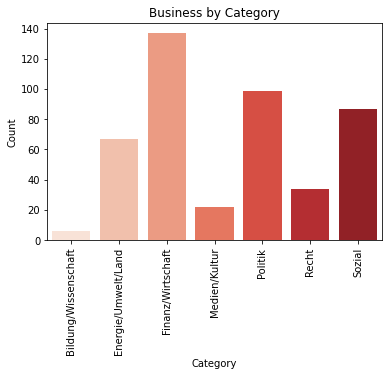

In [ ]:
#creating the plot
plot_tag = sns.barplot(x='tag', y='values', data=df_tags, palette="Reds")
plot_tag.set(xlabel='Category', ylabel='Count')
plot_tag.set(title='Business by Category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'PersonNumber', 'FirstName', 'LastName', 'GenderAsString',
       'CantonAbbreviation', 'PartyName', 'ParlGroupName',
       'ParlGroupAbbreviation', 'BirthPlace_Canton', 'DateJoining',
       'DateLeaving', 'DateOfBirth', 'Age', 'Region_x', 'Region_y', 'IdVote',
       'Decision', 'DecisionText', 'BusinessNumber', 'BusinessTitle',
       'IdSession', 'ID', 'BusinessType', 'BusinessTypeName',
       'SubmissionSession', 'Bildung/Wissenschaft', 'Energie/Umwelt/Land',
       'Finanz/Wirtschaft', 'Medien/Kultur', 'Politik', 'Recht', 'Sozial',
       'BGer', 'BK', 'EDA', 'EDI', 'EFD', 'EJPD', 'Parl', 'UVEK', 'VBS',
       'WBF'],
      dtype='object')

In [ ]:
#the same but for responsible department
cols = ['BGer','BK', 'EDA',
       'EDI', 'EFD', 'EJPD', 'Parl', 'UVEK', 'VBS', 'WBF']
df_object_dep= df_object2.loc[:, cols]

In [ ]:
df_object_dep

,BGer,BK,EDA,EDI,EFD,EJPD,Parl,UVEK,VBS
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
768,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
48973,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49149,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49510,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
for i in df_object_dep.columns:
    x = df_object_dep[i].value_counts()
    print(x)

0.0    267
Name: BGer, dtype: int64
0.0    256
1.0     11
Name: BK, dtype: int64
0.0    265
1.0      2
Name: EDA, dtype: int64
0.0    232
1.0     35
Name: EDI, dtype: int64
0.0    182
1.0     85
Name: EFD, dtype: int64
0.0    239
1.0     28
Name: EJPD, dtype: int64
0.0    264
1.0      3
Name: Parl, dtype: int64
0.0    216
1.0     51
Name: UVEK, dtype: int64
0.0    241
1.0     26
Name: VBS, dtype: int64
0.0    241
1.0     26
Name: WBF, dtype: int64


In [ ]:
df_dep = pd.DataFrame({'dep':('BK', 'EDA', 'EDI', 'EFD', 'EJPD', 'Parl', 'UVEK', 'VBS', 'WBF'), 'values':[11,2,35,85,28,3,51,26,26]})

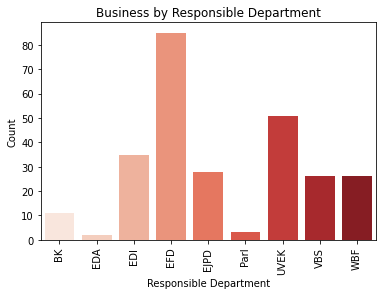

In [ ]:
plot_dep = sns.barplot(x='dep', y='values', data=df_dep, palette="Reds")
plot_dep.set(xlabel='Responsible Department', ylabel='Count')
plot_dep.set(title='Business by Responsible Department')
plt.xticks(rotation=90)
plt.show()

## Councilors

In [ ]:
#reminder column names
df.columns

Index(['Unnamed: 0', 'PersonNumber', 'FirstName', 'LastName', 'GenderAsString',
       'CantonAbbreviation', 'PartyName', 'ParlGroupName',
       'ParlGroupAbbreviation', 'BirthPlace_Canton', 'DateJoining',
       'DateLeaving', 'DateOfBirth', 'Age', 'Region_x', 'Region_y', 'IdVote',
       'Decision', 'DecisionText', 'BusinessNumber', 'BusinessTitle',
       'IdSession', 'ID', 'BusinessType', 'BusinessTypeName',
       'SubmissionSession', 'Bildung/Wissenschaft', 'Energie/Umwelt/Land',
       'Finanz/Wirtschaft', 'Medien/Kultur', 'Politik', 'Recht', 'Sozial',
       'BGer', 'BK', 'EDA', 'EDI', 'EFD', 'EJPD', 'Parl', 'UVEK', 'VBS',
       'WBF'],
      dtype='object')

In [ ]:
#selecting the columns necessary for the descriptive statistics of the councilors
cols = ['PersonNumber', 'GenderAsString','Region_x', 'Age', 'Region_y']
df_counc= df.loc[:, cols]

In [ ]:
#drop duplicates
df_unique_counc = df_counc.drop_duplicates(subset=['PersonNumber'], keep='first')
len(df_unique_counc)

203

In [ ]:
df_unique_counc

,PersonNumber,GenderAsString,Region_x,Age,Region_y
0,1138,m,CH-de,58,Right
4,3897,f,CH-de,43,Right
8,4248,f,CH-de,51,Right
12,4267,f,CH-de,35,Right
16,4274,m,CH-de,47,Right
...,...,...,...,...,...
3386,4065,f,CH-de,42,Right
3396,4100,m,CH-de,55,Right
3741,4266,m,CH-de,40,Right
5310,4074,m,CH-fr,65,Left


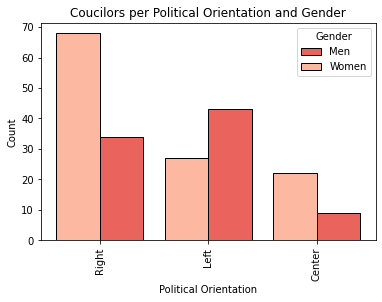

In [ ]:
plot_coun1 = sns.histplot(data=df_unique_counc, x='Region_y', hue='GenderAsString', shrink=.8, multiple="dodge", palette = "Reds")
plot_coun1.set(xlabel='Political Orientation', ylabel='Count')
plot_coun1.set(title='Coucilors per Political Orientation and Gender')
plt.legend(title='Gender', labels=['Men', 'Women'])
plt.xticks(rotation=90)
plt.show()

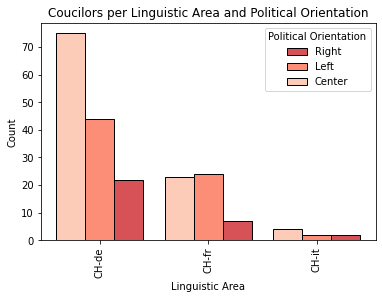

In [ ]:
plot_coun2 = sns.histplot(data=df_unique_counc, x='Region_x', hue='Region_y', shrink=.8, multiple="dodge", palette = "Reds")
plot_coun2.set(xlabel='Linguistic Area', ylabel='Count')
plot_coun2.set(title='Coucilors per Linguistic Area and Political Orientation')
plt.legend(title='Political Orientation', labels=['Right', 'Left', 'Center'])
plt.xticks(rotation=90)
plt.show()

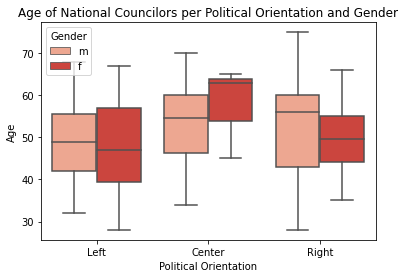

In [ ]:
plot_age = sns.boxplot(x = 'Region_y', y='Age', hue = 'GenderAsString', data = df_unique_counc, palette = 'Reds', order=["Left", "Center", "Right"])
plot_age.set(xlabel='Political Orientation')
plot_age.set(title='Age of National Councilors per Political Orientation and Gender')
plot_age.legend(title='Gender', loc='upper left')
plt.show()

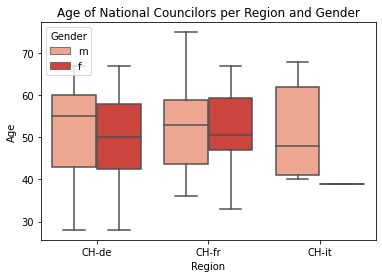

In [ ]:
plot_age_reg = sns.boxplot(x = 'Region_x', y='Age', hue = 'GenderAsString', data = df_unique_counc, palette = 'Reds')
plot_age_reg.set(xlabel='Region')
plot_age_reg.set(title='Age of National Councilors per Region and Gender')
plot_age_reg.legend(title='Gender', loc='upper left')
plt.show()

## Voting & Business 

In [ ]:
df_voting = df
df_voting['GenderAsString'] = df_voting['GenderAsString'].replace(['f'], 'Women')
df_voting['GenderAsString'] = df_voting['GenderAsString'].replace(['m'], 'Men')
df_voting['Decision'] = df_voting['Decision'].replace([1], 'Yes')
df_voting['Decision'] = df_voting['Decision'].replace([2], 'No')
df_voting['Decision'] = df_voting['Decision'].replace([3], 'No Vote')

In [ ]:
len(df_voting)

49871

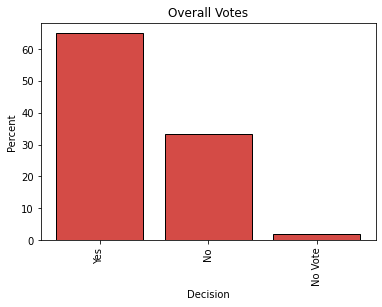

In [ ]:
plot_vote = sns.histplot(data=df_voting, x='Decision', shrink=.8, multiple="dodge", stat="percent", color = "#C60E08")
plot_vote.set(xlabel='Decision', ylabel='Percent')
plot_vote.set(title='Overall Votes')
plt.xticks(rotation=90)
plt.show()

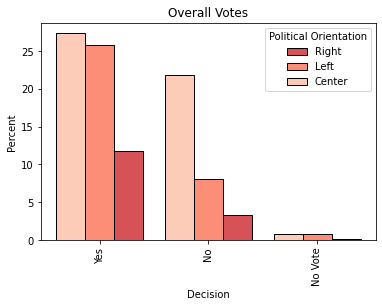

In [ ]:
plot_vote = sns.histplot(data=df_voting, x='Decision', hue= 'Region_y', shrink=.8, multiple="dodge", stat="percent", palette = "Reds")
plot_vote.set(xlabel='Decision', ylabel='Percent')
plot_vote.set(title='Overall Votes')
plt.legend(title='Political Orientation', labels=['Right', 'Left', 'Center'])
plt.xticks(rotation=90)
plt.show()

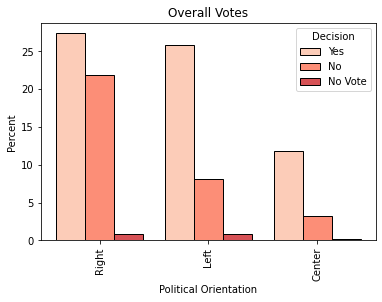

In [ ]:
plot_vote = sns.histplot(data=df_voting, x='Region_y', hue= 'Decision', shrink=.8, multiple="dodge", stat="percent", palette = "Reds")
plot_vote.set(xlabel='Political Orientation', ylabel='Percent')
plot_vote.set(title='Overall Votes')
plt.xticks(rotation=90)
plt.show()

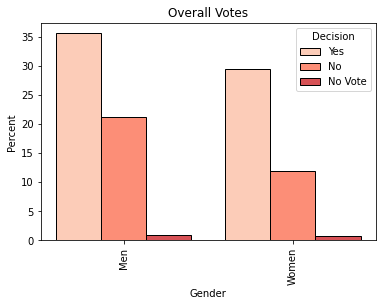

In [ ]:
plot_vote = sns.histplot(data=df_voting, x='GenderAsString', hue= 'Decision', shrink=.8, multiple="dodge", stat="percent", palette = "Reds")
plot_vote.set(xlabel='Gender', ylabel='Percent')
plot_vote.set(title='Overall Votes')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plot_vote = sns.histplot(data=df_voting, x='GenderAsString', hue= 'Decision', shrink=.8, multiple="dodge", stat="percent", palette = "Reds")
plot_vote.set(xlabel='Gender', ylabel='Percent')
plot_vote.set(title='Overall Votes')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_voting.columns

Index(['Unnamed: 0', 'PersonNumber', 'FirstName', 'LastName', 'GenderAsString',
       'CantonAbbreviation', 'PartyName', 'ParlGroupName',
       'ParlGroupAbbreviation', 'BirthPlace_Canton', 'DateJoining',
       'DateLeaving', 'DateOfBirth', 'Age', 'Region_x', 'Region_y', 'IdVote',
       'Decision', 'DecisionText', 'BusinessNumber', 'BusinessTitle',
       'IdSession', 'ID', 'BusinessType', 'BusinessTypeName',
       'SubmissionSession', 'Bildung/Wissenschaft', 'Energie/Umwelt/Land',
       'Finanz/Wirtschaft', 'Medien/Kultur', 'Politik', 'Recht', 'Sozial',
       'BGer', 'BK', 'EDA', 'EDI', 'EFD', 'EJPD', 'Parl', 'UVEK', 'VBS',
       'WBF'],
      dtype='object')

In [ ]:
#selecting the columns necessary for the descriptive statistics of the votes in 'Bildung/Wissenschaft'
colsBW = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'Bildung/Wissenschaft']
df_voting_BW= df_voting.loc[:, colsBW]

colsEU = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'Energie/Umwelt/Land']
df_voting_EU= df_voting.loc[:, colsEU]

colsFW = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'Finanz/Wirtschaft']
df_voting_FW= df_voting.loc[:, colsFW]

colsMK = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'Medien/Kultur']
df_voting_MK= df_voting.loc[:, colsMK]

colsP = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'Politik']
df_voting_P= df_voting.loc[:, colsP]

colsR = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'Recht']
df_voting_R= df_voting.loc[:, colsR]

colsS = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'Sozial']
df_voting_S= df_voting.loc[:, colsS]

In [ ]:
df_voting_BW=df_voting_BW.loc[df_voting_BW['Bildung/Wissenschaft'] == 1]
df_voting_BW

df_voting_EU=df_voting_EU.loc[df_voting_EU['Energie/Umwelt/Land'] == 1]
df_voting_EU

df_voting_FW=df_voting_FW.loc[df_voting_FW['Finanz/Wirtschaft'] == 1]
df_voting_FW

df_voting_MK=df_voting_MK.loc[df_voting_MK['Medien/Kultur'] == 1]
df_voting_MK

df_voting_P=df_voting_P.loc[df_voting_P['Politik'] == 1]
df_voting_P

df_voting_R=df_voting_R.loc[df_voting_R['Recht'] == 1]
df_voting_R

df_voting_S=df_voting_S.loc[df_voting_S['Sozial'] == 1]
df_voting_S

,GenderAsString,Region_x,Region_y,IdVote,Decision,Sozial
6242,Men,CH-de,Right,28726,Yes,1.0
6243,Men,CH-de,Right,29426,No Vote,1.0
6244,Women,CH-de,Right,28726,Yes,1.0
6245,Women,CH-de,Right,29426,Yes,1.0
6246,Women,CH-de,Right,28726,Yes,1.0
...,...,...,...,...,...,...
49505,Men,CH-de,Center,28647,Yes,1.0
49506,Men,CH-de,Center,28647,Yes,1.0
49507,Men,CH-de,Center,28647,Yes,1.0
49508,Men,CH-fr,Center,28647,Yes,1.0


In [ ]:
for i in df_voting_BW.columns:
    x = df_voting_BW[i].value_counts()
    print(x)

m    621
f    476
Name: GenderAsString, dtype: int64
CH-de    755
CH-fr    299
CH-it     43
Name: Region_x, dtype: int64
Right     540
Left      395
Center    162
Name: Region_y, dtype: int64
28924    191
29344    185
29385    183
29387    183
29388    183
28899    172
Name: IdVote, dtype: int64
1    733
2    355
3      9
Name: Decision, dtype: int64
1.0    1097
Name: Bildung/Wissenschaft, dtype: int64


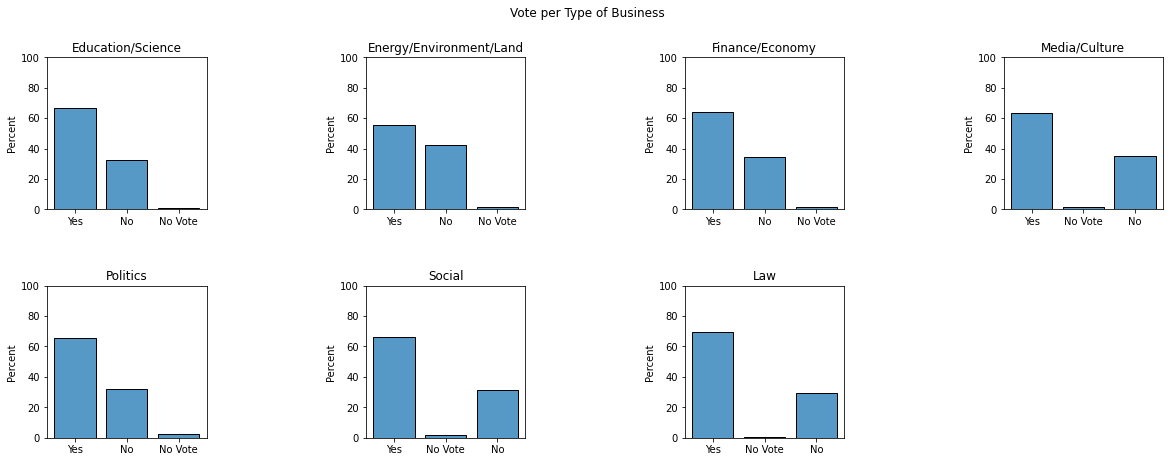

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(20, 7))
fig.suptitle('Vote per Type of Business')
fig.subplots_adjust(hspace=0.5, wspace=1)


sns.histplot(data=df_voting_BW, x='Decision', stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,0])
axes[0,0].set(title = "Education/Science", xlabel='')
axes[0,0].set_ylim(0,100)

sns.histplot(data=df_voting_EU, x='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,1])
axes[0,1].set(title = "Energy/Environment/Land", xlabel='')
axes[0,1].legend([],[], frameon=False)
axes[0,1].set_ylim(0,100)

sns.histplot(data=df_voting_FW, x='Decision', stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,2])
axes[0,2].set(title = "Finance/Economy", xlabel='')
axes[0,2].legend([],[], frameon=False)
axes[0,2].set_ylim(0,100)

sns.histplot(data=df_voting_MK, x='Decision', stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,3], hue_order = ['Yes','No','No Vote'])
axes[0,3].set(title = "Media/Culture", xlabel='')
axes[0,3].legend([],[], frameon=False)
axes[0,3].set_ylim(0,100)

sns.histplot(data=df_voting_P, x='Decision', stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,0])
axes[1,0].set(title = "Politics", xlabel='')
axes[1,0].legend([],[], frameon=False)
axes[1,0].set_ylim(0,100)

sns.histplot(data=df_voting_R, x='Decision', stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,2], hue_order = ['Yes','No','No Vote'])
axes[1,2].set(title = "Law", xlabel='')
axes[1,2].legend([],[], frameon=False)
axes[1,2].set_ylim(0,100)

sns.histplot(data=df_voting_S, x='Decision', stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,1], hue_order = ['Yes','No','No Vote'])
axes[1,1].set(title = "Social", xlabel='')
axes[1,1].legend([],[], frameon=False)
axes[1,1].set_ylim(0,100)

axes[1,3].set_axis_off()

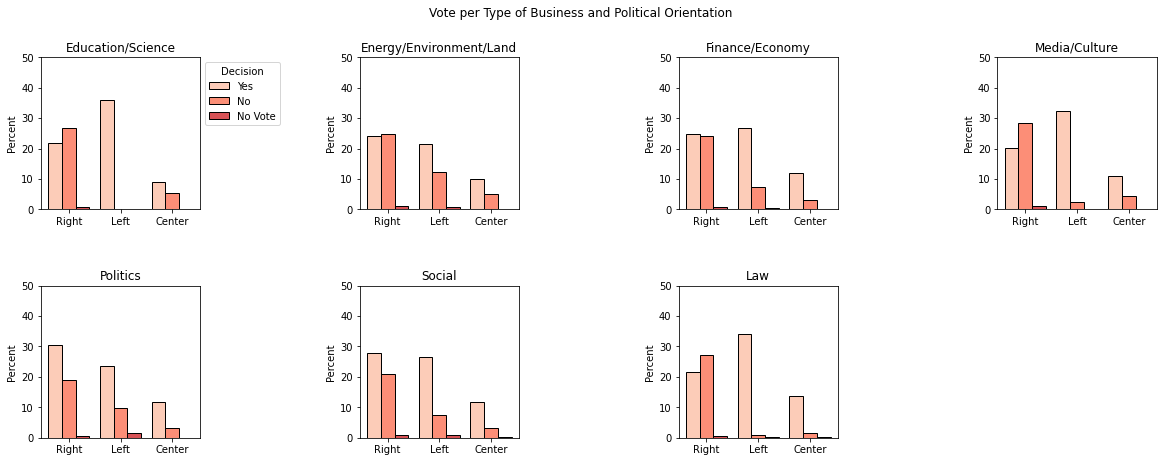

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(20, 7))
fig.suptitle('Vote per Type of Business and Political Orientation')
fig.subplots_adjust(hspace=0.5, wspace=1)


sns.histplot(data=df_voting_BW, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,0])
axes[0,0].set(title = "Education/Science", xlabel='')
sns.move_legend(axes[0,0], "upper left", bbox_to_anchor=(1, 1))
axes[0,0].set_ylim(0,50)

sns.histplot(data=df_voting_EU, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,1])
axes[0,1].set(title = "Energy/Environment/Land", xlabel='')
axes[0,1].legend([],[], frameon=False)
axes[0,1].set_ylim(0,50)

sns.histplot(data=df_voting_FW, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,2])
axes[0,2].set(title = "Finance/Economy", xlabel='')
axes[0,2].legend([],[], frameon=False)
axes[0,2].set_ylim(0,50)

sns.histplot(data=df_voting_MK, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,3], hue_order = ['Yes','No','No Vote'])
axes[0,3].set(title = "Media/Culture", xlabel='')
axes[0,3].legend([],[], frameon=False)
axes[0,3].set_ylim(0,50)

sns.histplot(data=df_voting_P, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,0])
axes[1,0].set(title = "Politics", xlabel='')
axes[1,0].legend([],[], frameon=False)
axes[1,0].set_ylim(0,50)

sns.histplot(data=df_voting_R, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,2], hue_order = ['Yes','No','No Vote'])
axes[1,2].set(title = "Law", xlabel='')
axes[1,2].legend([],[], frameon=False)
axes[1,2].set_ylim(0,50)

sns.histplot(data=df_voting_S, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,1], hue_order = ['Yes','No','No Vote'])
axes[1,1].set(title = "Social", xlabel='')
axes[1,1].legend([],[], frameon=False)
axes[1,1].set_ylim(0,50)

axes[1,3].set_axis_off()

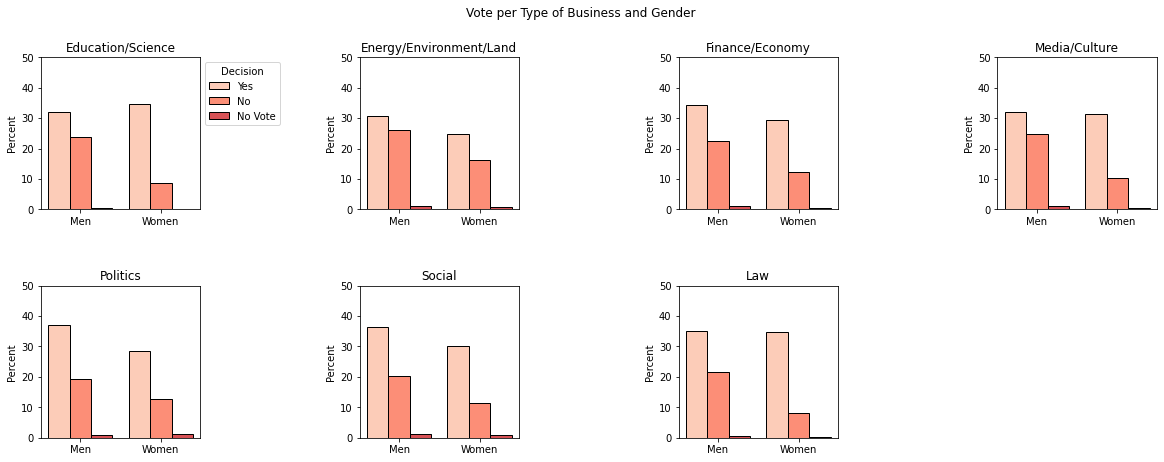

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(20, 7))
fig.suptitle('Vote per Type of Business and Gender')
fig.subplots_adjust(hspace=0.5, wspace=1)


sns.histplot(data=df_voting_BW, x='GenderAsString', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,0])
axes[0,0].set(title = "Education/Science", xlabel='')
sns.move_legend(axes[0,0], "upper left", bbox_to_anchor=(1, 1))
axes[0,0].set_ylim(0,50)

sns.histplot(data=df_voting_EU, x='GenderAsString', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,1])
axes[0,1].set(title = "Energy/Environment/Land", xlabel='')
axes[0,1].legend([],[], frameon=False)
axes[0,1].set_ylim(0,50)

sns.histplot(data=df_voting_FW, x='GenderAsString', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,2])
axes[0,2].set(title = "Finance/Economy", xlabel='')
axes[0,2].legend([],[], frameon=False)
axes[0,2].set_ylim(0,50)

sns.histplot(data=df_voting_MK, x='GenderAsString', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,3], hue_order = ['Yes','No','No Vote'])
axes[0,3].set(title = "Media/Culture", xlabel='')
axes[0,3].legend([],[], frameon=False)
axes[0,3].set_ylim(0,50)

sns.histplot(data=df_voting_P, x='GenderAsString', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,0])
axes[1,0].set(title = "Politics", xlabel='')
axes[1,0].legend([],[], frameon=False)
axes[1,0].set_ylim(0,50)

sns.histplot(data=df_voting_R, x='GenderAsString', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,2], hue_order = ['Yes','No','No Vote'])
axes[1,2].set(title = "Law", xlabel='')
axes[1,2].legend([],[], frameon=False)
axes[1,2].set_ylim(0,50)

sns.histplot(data=df_voting_S, x='GenderAsString', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,1], hue_order = ['Yes','No','No Vote'])
axes[1,1].set(title = "Social", xlabel='')
axes[1,1].legend([],[], frameon=False)
axes[1,1].set_ylim(0,50)

axes[1,3].set_axis_off()

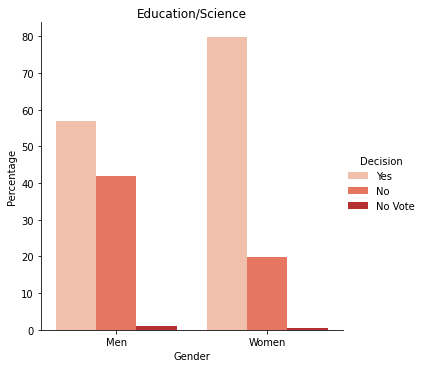

In [ ]:
x,y = 'GenderAsString', 'Decision'
plot_BW =(df_voting_BW
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', palette="Reds"))
plot_BW.set(xlabel='Gender', ylabel='Percentage')
plot_BW.set(title='Education/Science')


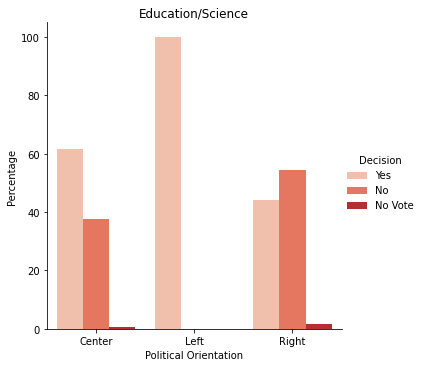

In [ ]:
x,y = 'Region_y', 'Decision'
plot_BW_polit =(df_voting_BW
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', palette="Reds"))
plot_BW_polit.set(xlabel='Political Orientation', ylabel='Percentage')
plot_BW_polit.set(title='Education/Science')

In [ ]:
df_BW_party = df_voting_BW.groupby(['Region_y'])['Decision'].value_counts(normalize=True).unstack()
df_BW_party


Decision,No,No Vote,Yes
Region_y,,,
Center,0.376543,0.006173,0.617284
Left,NaN,NaN,1.000000
Right,0.544444,0.014815,0.440741


In [ ]:
df_voting.columns

Index(['Unnamed: 0', 'PersonNumber', 'FirstName', 'LastName', 'GenderAsString',
       'CantonAbbreviation', 'PartyName', 'ParlGroupName',
       'ParlGroupAbbreviation', 'BirthPlace_Canton', 'DateJoining',
       'DateLeaving', 'DateOfBirth', 'Age', 'Region_x', 'Region_y', 'IdVote',
       'Decision', 'DecisionText', 'BusinessNumber', 'BusinessTitle',
       'IdSession', 'ID', 'BusinessType', 'BusinessTypeName',
       'SubmissionSession', 'Bildung/Wissenschaft', 'Energie/Umwelt/Land',
       'Finanz/Wirtschaft', 'Medien/Kultur', 'Politik', 'Recht', 'Sozial',
       'BGer', 'BK', 'EDA', 'EDI', 'EFD', 'EJPD', 'Parl', 'UVEK', 'VBS',
       'WBF'],
      dtype='object')

In [ ]:
colsBG = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'BGer']
df_voting_BG= df_voting.loc[:, colsBG]

colsBK = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'BK']
df_voting_BK= df_voting.loc[:, colsBK]

colsEDA = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'EDA']
df_voting_EDA= df_voting.loc[:, colsEDA]

colsEDI = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'EDI']
df_voting_EDI= df_voting.loc[:, colsEDI]

colsEFD = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'EFD']
df_voting_EFD= df_voting.loc[:, colsEFD]

colsEJPD = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'EJPD']
df_voting_EJPD= df_voting.loc[:, colsEJPD]

colsParl = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'Parl']
df_voting_Parl= df_voting.loc[:, colsParl]

colsVBS = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'VBS']
df_voting_VBS= df_voting.loc[:, colsVBS]

colsUVEK = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'UVEK']
df_voting_UVEK= df_voting.loc[:, colsUVEK]

colsWBF = ['GenderAsString',
       'Region_x', 'Region_y', 'IdVote', 'Decision', 'WBF']
df_voting_WBF= df_voting.loc[:, colsWBF]

In [ ]:
df_voting_BG=df_voting_BG.loc[df_voting_BG['BGer'] == 1]

df_voting_BK=df_voting_BK.loc[df_voting_BK['BK'] == 1]


df_voting_EDA=df_voting_EDA.loc[df_voting_EDA['EDA'] == 1]

df_voting_EDI=df_voting_EDI.loc[df_voting_EDI['EDI'] == 1]


df_voting_EFD=df_voting_EFD.loc[df_voting_EFD['EFD'] == 1]


df_voting_EJPD=df_voting_EJPD.loc[df_voting_EJPD['EJPD'] == 1]


df_voting_Parl=df_voting_Parl.loc[df_voting_Parl['Parl'] == 1]

df_voting_VBS=df_voting_VBS.loc[df_voting_VBS['VBS'] == 1]

df_voting_UVEK=df_voting_UVEK.loc[df_voting_UVEK['UVEK'] == 1]

df_voting_WBF=df_voting_WBF.loc[df_voting_WBF['WBF'] == 1]

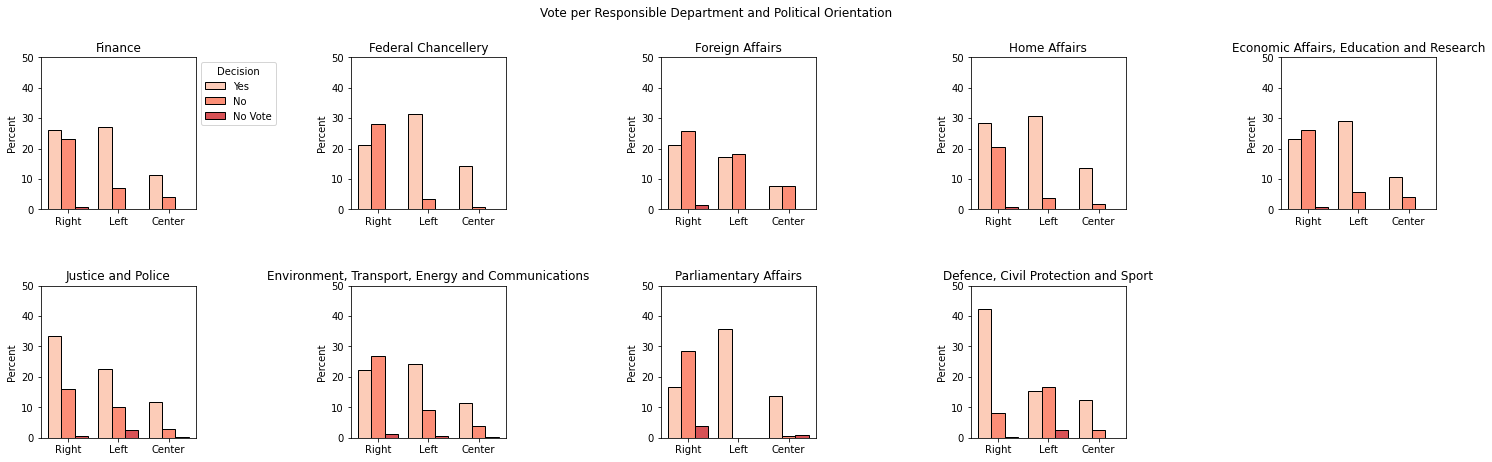

In [ ]:
fig, axes = plt.subplots(2,5, figsize=(25, 7))
fig.suptitle('Vote per Responsible Department and Political Orientation')
fig.subplots_adjust(hspace=0.5, wspace=1)


sns.histplot(data=df_voting_EFD, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,0])
axes[0,0].set(title = "Finance", xlabel='')
sns.move_legend(axes[0,0], "upper left", bbox_to_anchor=(1, 1))
axes[0,0].set_ylim(0,50)

sns.histplot(data=df_voting_BK, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,1])
axes[0,1].set(title = "Federal Chancellery", xlabel='')
axes[0,1].legend([],[], frameon=False)
axes[0,1].set_ylim(0,50)

sns.histplot(data=df_voting_EDA, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,2])
axes[0,2].set(title = "Foreign Affairs", xlabel='')
axes[0,2].legend([],[], frameon=False)
axes[0,2].set_ylim(0,50)

sns.histplot(data=df_voting_EDI, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,3], hue_order = ['Yes','No','No Vote'])
axes[0,3].set(title = "Home Affairs", xlabel='')
axes[0,3].legend([],[], frameon=False)
axes[0,3].set_ylim(0,50)

sns.histplot(data=df_voting_EJPD, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,0])
axes[1,0].set(title = "Justice and Police", xlabel='')
axes[1,0].legend([],[], frameon=False)
axes[1,0].set_ylim(0,50)

sns.histplot(data=df_voting_Parl, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,2], hue_order = ['Yes','No','No Vote'])
axes[1,2].set(title = "Parliamentary Affairs", xlabel='')
axes[1,2].legend([],[], frameon=False)
axes[1,2].set_ylim(0,50)

sns.histplot(data=df_voting_VBS, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,3], hue_order = ['Yes','No','No Vote'])
axes[1,3].set(title = "Defence, Civil Protection and Sport", xlabel='')
axes[1,3].legend([],[], frameon=False)
axes[1,3].set_ylim(0,50)

sns.histplot(data=df_voting_UVEK, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[1,1], hue_order = ['Yes','No','No Vote'])
axes[1,1].set(title = "Environment, Transport, Energy and Communications", xlabel='')
axes[1,1].legend([],[], frameon=False)
axes[1,1].set_ylim(0,50)


sns.histplot(data=df_voting_WBF, x='Region_y', hue='Decision',stat="percent", multiple="dodge", shrink=.8, palette = "Reds", ax=axes[0,4], hue_order = ['Yes','No','No Vote'])
axes[0,4].set(title = "Economic Affairs, Education and Research", xlabel='')
axes[0,4].legend([],[], frameon=False)
axes[0,4].set_ylim(0,50)


axes[1,4].set_axis_off()

## Questions: 
1. Quelles visualisation? D'autres idées que des barplots?
2. Bger = Position du CF? 
3. Distribution? --> Age et ancienneté? 
